In [20]:
import os  # For accessing environment variables
import refinitiv.data as rd  # Refinitiv library
from datetime import datetime, timedelta  # For date manipulation

# Retrieve the app key from an environment variable
app_key = os.getenv("REFINITIV_APP_KEY")

# Ensure the app key is set
if not app_key:
    print("Error: Environment variable 'REFINITIV_APP_KEY' is not set.")
    exit()

# Open a session
try:
    rd.open_session(app_key=app_key)
    print("Session opened successfully.")
except Exception as e:
    print(f"Failed to open session: {e}")
    exit()

# Fetch historical data
try:
    # Define date range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365)

    # Fetch data with adjusted fields
    df = rd.get_history(
        universe="DBKGn.DE",  # Replace with your desired instrument
        fields=["TRDPRC_1", "TRNOVR_UNS"],  # Adjusted fields
        start=start_date.strftime('%Y-%m-%d'),
        end=end_date.strftime('%Y-%m-%d'),
        interval="daily"
    )

    # Check if data is available
    if not df.empty:
        print("Data fetched successfully!")
        print(df.head())
    else:
        print("No data returned. Verify fields or instrument.")

except Exception as e:
    print(f"Error fetching data: {e}")

# Close the session
finally:
    try:
        rd.close_session()
        print("Session closed successfully.")
    except Exception as e:
        print(f"Error closing session: {e}")



Session opened successfully.
Error fetching data: Error code 403 | access denied. Scopes required to access the resource: [trapi.data.pricing.read]. Missing scopes: [trapi.data.pricing.read]. Contact Refinitiv to check your permissions.


In [21]:
# Define date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch data with adjusted fields
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['TRDPRC_1', 'TRNOVR_UNS'],  # Adjusted fields
    start=start_date.strftime('%Y-%m-%d'),
    end=end_date.strftime('%Y-%m-%d'),
    interval='daily'
)

# Check if data is available
if not df.empty:
    print("Data fetched successfully!")
    print(df.head())
else:
    print("No data returned. Verify fields or instrument.")

# Close session
#rd.close_session()


Data fetched successfully!
DBKGn.DE    TRDPRC_1    TRNOVR_UNS
Date                              
2024-02-08      <NA>  84433876.912
2024-02-09      <NA>  79407915.338
2024-02-12      <NA>   63431626.64
2024-02-13      <NA>  76199422.984
2024-02-14      <NA>   69090375.02


/opt/anaconda3/lib/python3.12/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [22]:
# Open session and fetch data
rd.open_session(app_key='cb64a413a4f04804b8a6a82bde9c35087f7f819c')
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['CLOSE_ADJ', 'VWAP'],  # Adjusted Close and Volume Weighted Average Price
    start=start_date.strftime('%Y-%m-%d'),
    end=end_date.strftime('%Y-%m-%d'),
    interval='daily'
)
print(df)


DBKGn.DE    CLOSE_ADJ     VWAP
Date                          
2024-02-08       <NA>  11.6674
2024-02-09       <NA>   11.602
2024-02-12       <NA>  11.8276
2024-02-13       <NA>  11.8903
2024-02-14       <NA>  11.9652
...               ...      ...
2025-01-30       <NA>   18.747
2025-01-31       <NA>  18.9754
2025-02-03       <NA>  18.3646
2025-02-04       <NA>  18.1853
2025-02-05       <NA>  18.0949

[252 rows x 2 columns]


/opt/anaconda3/lib/python3.12/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [23]:
data = rd.get_data(
    universe="DBKGn.DE",
    fields=["TRDPRC_1", "BID", "ASK", "VOLUME"]
)
print(data)


  Instrument  TRDPRC_1     BID     ASK  VOLUME
0   DBKGn.DE    18.074  18.058  18.062    <NA>


/opt/anaconda3/lib/python3.12/site-packages/refinitiv/data/_tools/_dataframe.py:177:FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [24]:
print(df.head())  # Display the first few rows of the DataFrame
print(df.columns)  # Check the column names


DBKGn.DE    CLOSE_ADJ     VWAP
Date                          
2024-02-08       <NA>  11.6674
2024-02-09       <NA>   11.602
2024-02-12       <NA>  11.8276
2024-02-13       <NA>  11.8903
2024-02-14       <NA>  11.9652
Index(['CLOSE_ADJ', 'VWAP'], dtype='object', name='DBKGn.DE')


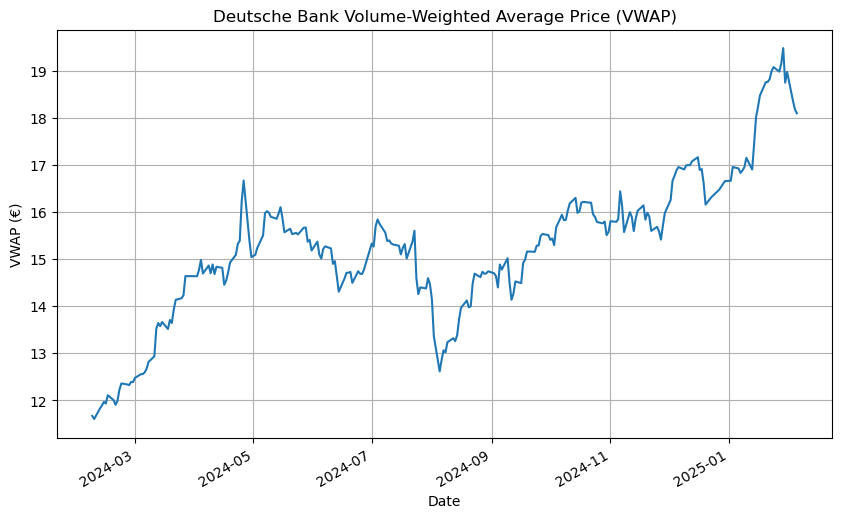

In [25]:
import matplotlib.pyplot as plt

# Check if VWAP exists and is not empty
if 'VWAP' in df.columns and not df['VWAP'].isna().all():
    # Plot VWAP
    df['VWAP'].plot(kind='line', figsize=(10, 6), title="Deutsche Bank Volume-Weighted Average Price (VWAP)")
    plt.xlabel("Date")
    plt.ylabel("VWAP (€)")
    plt.grid()
    plt.show()
else:
    print("VWAP data is not available or empty.")


Data fetched successfully!


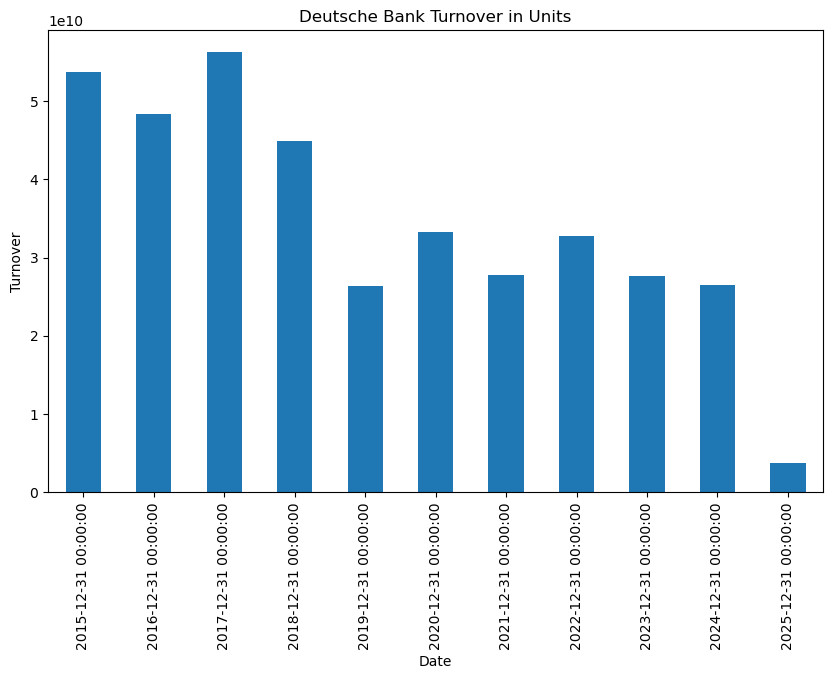

In [26]:
# Define date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch historical data
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['TRNOVR_UNS'],  # Focus on Turnover in Units
#     start=start_date.strftime('%Y-%m-%d'),
#     end=end_date.strftime('%Y-%m-%d'),
     start=start_date.strftime('%2015-%01-%01'),
    end=end_date.strftime('%2025-%02-%01'),
    interval='1Y'
)

# Plot Turnover if data is available
if not df.empty:
    print("Data fetched successfully!")
    df['TRNOVR_UNS'].plot(kind='bar', figsize=(10, 6), title="Deutsche Bank Turnover in Units")
    plt.xlabel("Date")
    plt.ylabel("Turnover")
    plt.show()
else:
    print("No data returned.")

# Close session
rd.close_session()
